# **Importing Required Libraries**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Reading the Dataset**

In [71]:
df = pd.read_csv('/autos.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'], encoding = 'latin1')

# **Cleaning the Dataset**

In [72]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [73]:
df = df[['dateCrawled', 'name', 'seller', 'offerType', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen', 'price']]

In [74]:
df.drop(columns= ['seller', 'offerType', 'nrOfPictures'], inplace = True)
df.drop(columns= ['dateCrawled', 'dateCreated', 'lastSeen'], inplace = True)

**Missing Values**

In [75]:
# Checking for Missing Values
df.isna().sum()


name                       0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
price                      0
dtype: int64

In [76]:
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['model'].fillna(df['model'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)

In [ ]:
df.isna().sum()

name                   0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
price                  0
dtype: int64

**Duplicate Values**

In [77]:
# Checking for Duplicates
df.duplicated().sum()

4703

In [ ]:
# Removing Duplicates
df = df.drop_duplicates()

In [78]:
df.duplicated().sum()

4703

**Label Encoding**

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 371528 non-null  object
 1   abtest               371528 non-null  object
 2   vehicleType          371528 non-null  object
 3   yearOfRegistration   371528 non-null  int64 
 4   gearbox              371528 non-null  object
 5   powerPS              371528 non-null  int64 
 6   model                371528 non-null  object
 7   kilometer            371528 non-null  int64 
 8   monthOfRegistration  371528 non-null  int64 
 9   fuelType             371528 non-null  object
 10  brand                371528 non-null  object
 11  notRepairedDamage    371528 non-null  object
 12  postalCode           371528 non-null  int64 
 13  price                371528 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 39.7+ MB


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['model'] = le.fit_transform(df['model'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   name                 371528 non-null  int64
 1   abtest               371528 non-null  int64
 2   vehicleType          371528 non-null  int64
 3   yearOfRegistration   371528 non-null  int64
 4   gearbox              371528 non-null  int64
 5   powerPS              371528 non-null  int64
 6   model                371528 non-null  int64
 7   kilometer            371528 non-null  int64
 8   monthOfRegistration  371528 non-null  int64
 9   fuelType             371528 non-null  int64
 10  brand                371528 non-null  int64
 11  notRepairedDamage    371528 non-null  int64
 12  postalCode           371528 non-null  int64
 13  price                371528 non-null  int64
dtypes: int64(14)
memory usage: 39.7 MB


**Identifying and Handling Outliers**

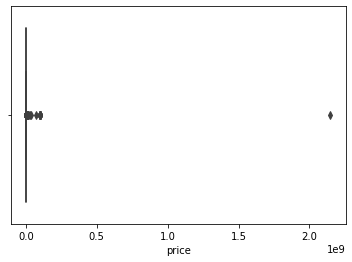

In [82]:
# Checking for outliers in 'price' column
sns.boxplot(x = df['price'])

In [83]:
a = df['price'].quantile(q=[0.75,0.25])
a

0.75    7200.0
0.25    1150.0
Name: price, dtype: float64

In [84]:
IQR = a.iloc[0] - a.iloc[1]
IQR

6050.0

In [85]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[0]-(1.5*IQR)

In [86]:
upper

16275.0

In [87]:
lower

-1875.0

In [88]:
# Dropping outliers in price
a = df[df['price'] > 20000].index
df.drop(a, inplace = True)

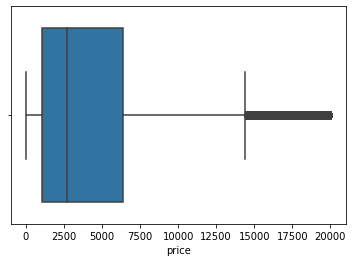

In [89]:
sns.boxplot(x = df['price'])

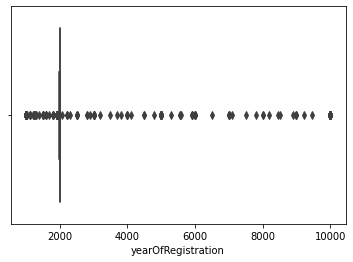

In [90]:
# Checking for outliers in 'yearOfRegistration' column
sns.boxplot(x = df['yearOfRegistration'])

In [91]:
a = df['yearOfRegistration'].quantile(q=[0.75,0.25])
a

0.75    2008.0
0.25    1999.0
Name: yearOfRegistration, dtype: float64

In [92]:
IQR = a.iloc[0] - a.iloc[1]
IQR

9.0

In [93]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[0]-(1.5*IQR)

In [94]:
upper

2021.5

In [95]:
lower

1994.5

In [96]:
# Dropping outliers in yearOfRegistration
a = df[df['yearOfRegistration'] > 2019].index
df.drop(a, inplace = True)
a = df[df['yearOfRegistration'] < 1970].index
df.drop(a, inplace = True)

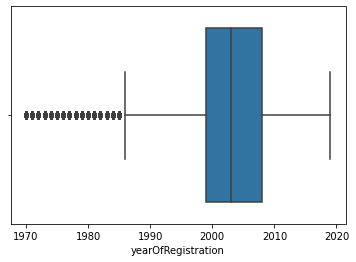

In [97]:
sns.boxplot(x = df['yearOfRegistration'])

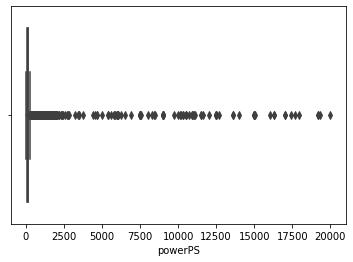

In [98]:
# Checking for outliers in 'powerPS' column 
sns.boxplot(x = df['powerPS'])

In [ ]:
a = df['powerPS'].quantile(q=[0.75,0.25])
a

0.75    141.0
0.25     69.0
Name: powerPS, dtype: float64

In [ ]:
IQR = a.iloc[0] - a.iloc[1]
IQR

72.0

In [ ]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[0]-(1.5*IQR)

In [ ]:
upper

249.0

In [ ]:
lower

33.0

In [ ]:
# Dropping outliers in powerPS
a = df[df['powerPS'] > 300].index
df.drop(a, inplace = True)

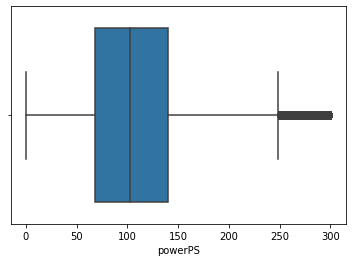

In [ ]:
sns.boxplot(x = df['powerPS'])

# **Visualization**

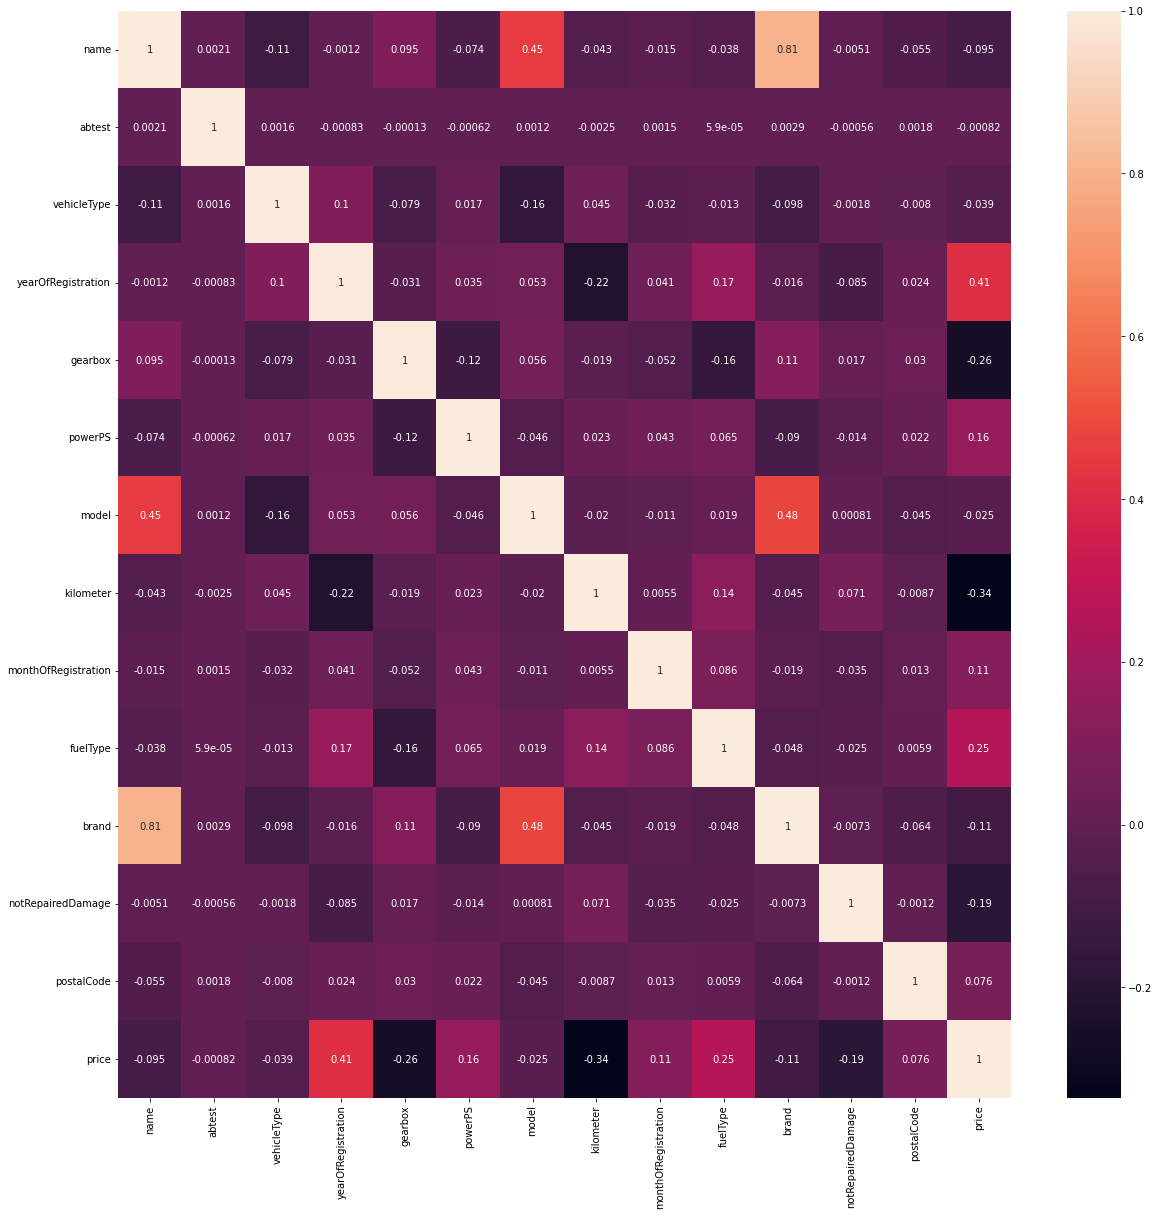

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

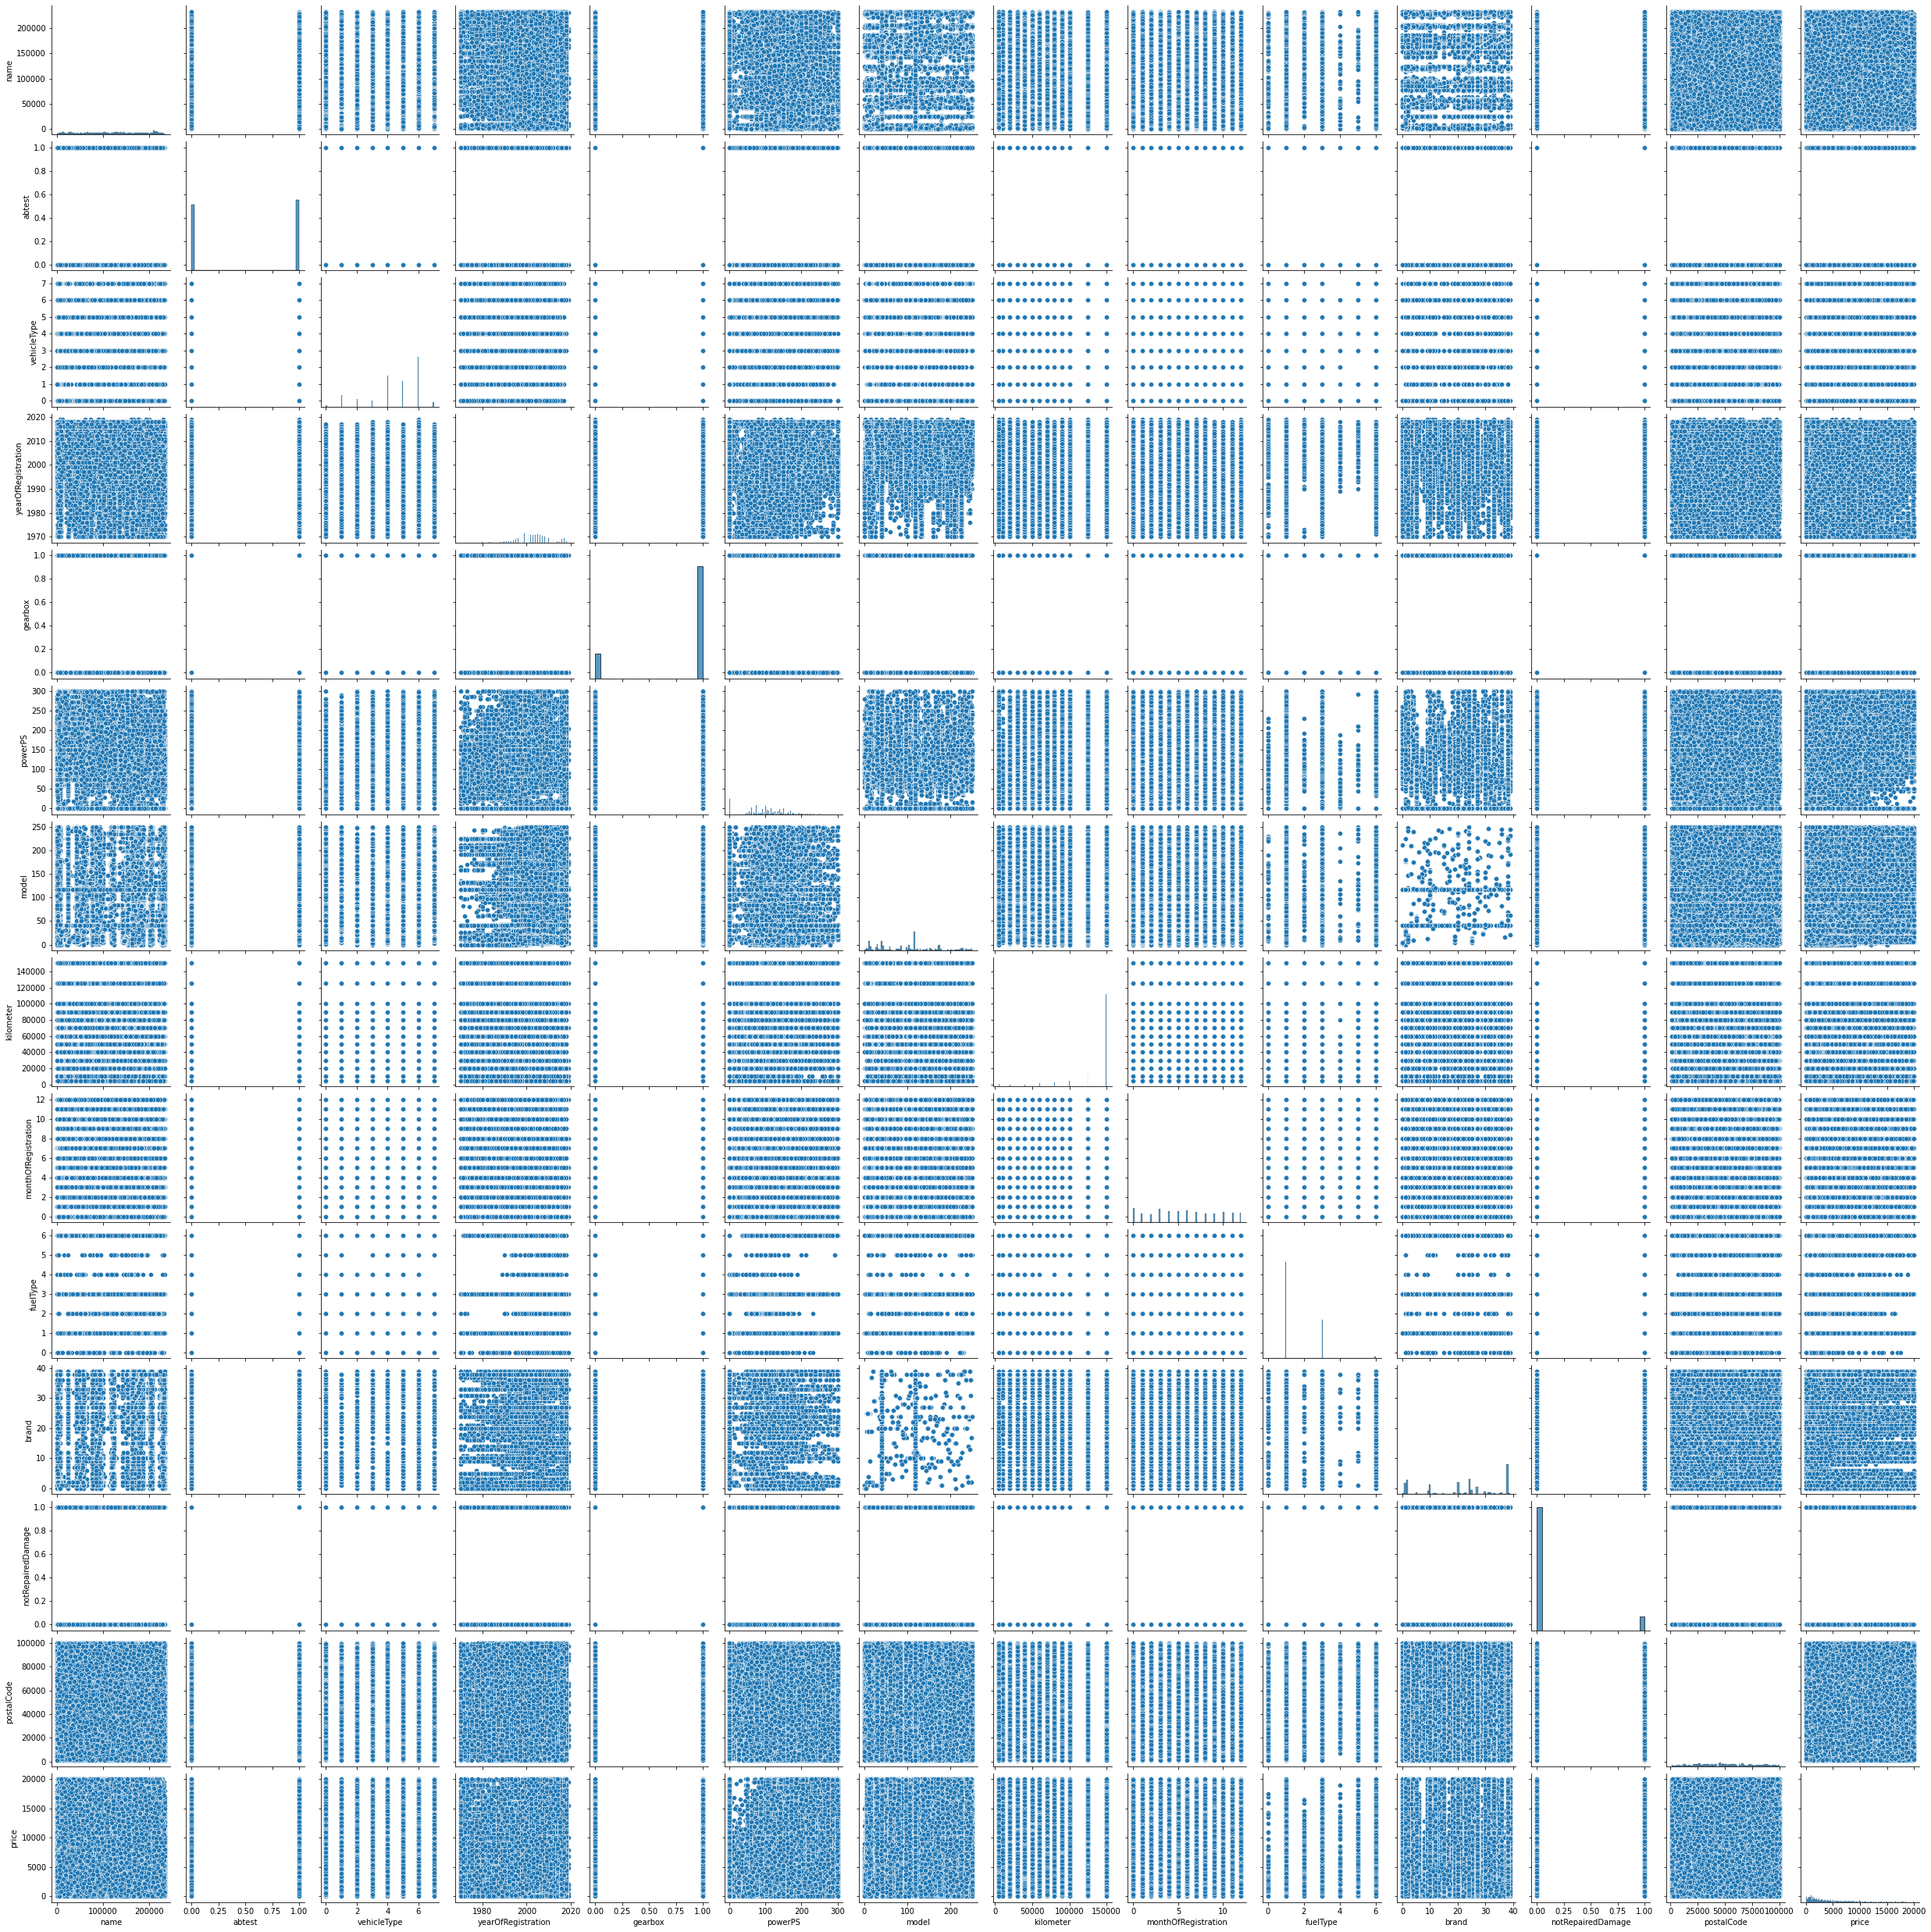

In [ ]:
sns.pairplot(df)
plt.show()

# Descriptive **Statistics**

In [100]:
df.nunique()

name                   221255
abtest                      2
vehicleType                 8
yearOfRegistration         50
gearbox                     2
powerPS                   707
model                     250
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
postalCode               8142
price                    3727
dtype: int64

In [ ]:
df.describe()

,name,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,price
count,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000,344985.000000
mean,117904.585912,0.518202,4.565471,2003.229619,0.819265,104.445576,101.906208,128498.297027,5.713486,1.635433,20.953288,0.102399,50611.506364,4334.176906
std,67510.545516,0.499669,1.661815,6.980320,0.384799,59.096644,69.350172,37593.780627,3.724734,1.043622,13.292488,0.303172,25748.050448,4439.494463
min,0.000000,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,1067.000000,0.000000
25%,60989.000000,0.000000,4.000000,1999.000000,1.000000,68.000000,40.000000,125000.000000,3.000000,1.000000,10.000000,0.000000,30179.000000,1000.000000
50%,119794.000000,1.000000,5.000000,2003.000000,1.000000,103.000000,104.000000,150000.000000,6.000000,1.000000,24.000000,0.000000,49477.000000,2690.000000
75%,175396.000000,1.000000,6.000000,2008.000000,1.000000,140.000000,153.000000,150000.000000,9.000000,3.000000,34.000000,0.000000,71126.000000,6200.000000
max,233530.000000,1.000000,7.000000,2019.000000,1.000000,300.000000,250.000000,150000.000000,12.000000,6.000000,39.000000,1.000000,99998.000000,20000.000000


In [ ]:
df.skew()

name                  -0.022347
abtest                -0.072858
vehicleType           -0.917651
yearOfRegistration    -0.360852
gearbox               -1.659392
powerPS                0.189407
model                  0.395804
kilometer             -1.737954
monthOfRegistration    0.082692
fuelType               1.542590
brand                 -0.172770
notRepairedDamage      2.622955
postalCode             0.075437
price                  1.461433
dtype: float64

In [ ]:
df.kurt()

name                  -1.200546
abtest                -1.994703
vehicleType           -0.028758
yearOfRegistration     1.432725
gearbox                0.753586
powerPS                0.085471
model                 -0.883618
kilometer              1.984077
monthOfRegistration   -1.147400
fuelType               2.400634
brand                 -1.310623
notRepairedDamage      4.879922
postalCode            -0.962817
price                  1.547299
dtype: float64

# **Splitting the Data**

In [101]:
# Splitting x and y variables
x = df.drop(columns = 'price')
y = df['price']

In [102]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# **Building Models**

In [103]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [104]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01, normalize=True)

In [105]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01, normalize=True)

In [106]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [107]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [122]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor() 
RF.fit(x_train, y_train)

RandomForestRegressor()

# **Checking the Metrics of the models**

In [110]:
# Linear Regression
lr.score(x_test, y_test)

0.38523564993870363

In [111]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

3541.5061860257147

In [112]:
# Lasso Regression
lasso.score(x_test, y_test)

0.38526963129719227

In [113]:
np.sqrt(mean_squared_error(y_test,lasso.predict(x_test)))

3541.408305549754

In [114]:
# Ridge Regression
ridge.score(x_test, y_test)

0.3852402445126166

In [115]:
np.sqrt(mean_squared_error(y_test,ridge.predict(x_test)))

3541.492951895974

In [116]:
# K Nearest Neighbour
knn.score(x_test, y_test)

0.36606715277167357

In [117]:
np.sqrt(mean_squared_error(y_test,knn.predict(x_test)))

3596.294881454182

In [118]:
# Decision Tree
DT.score(x_test, y_test)

0.7361183941834686

In [119]:
np.sqrt(mean_squared_error(y_test,DT.predict(x_test)))

2320.268405314096

In [123]:
RF.score(x_test, y_test)

0.861339598980134

# **Saving the Model**

In [121]:
import pickle
pickle.dump(RF, open('Car Resale Value Prediction.pkl', 'wb'))